[View in Colaboratory](https://colab.research.google.com/github/alohays/Neural-Nets-Study/blob/master/pytorch_study1_tutorial.ipynb)

In [5]:
from os import path
from wheel.pep425tags import get_abbr_impl, get_impl_ver, get_abi_tag
platform = '{}{}-{}'.format(get_abbr_impl(), get_impl_ver(), get_abi_tag())

accelerator = 'cu80' if path.exists('/opt/bin/nvidia-smi') else 'cpu'

!pip install -q http://download.pytorch.org/whl/{accelerator}/torch-0.4.0-{platform}-linux_x86_64.whl torchvision
import torch
print(torch.__version__)
print(torch.cuda.is_available())

0.4.0
True


In [3]:
!apt-get install -y -qq software-properties-common python-software-properties module-init-tools
!add-apt-repository -y ppa:alessandro-strada/ppa 2>&1 > /dev/null
!apt-get update -qq 2>&1 > /dev/null
!apt-get -y install -qq google-drive-ocamlfuse fuse
from google.colab import auth
auth.authenticate_user()
from oauth2client.client import GoogleCredentials
creds = GoogleCredentials.get_application_default()
import getpass
!google-drive-ocamlfuse -headless -id={creds.client_id} -secret={creds.client_secret} < /dev/null 2>&1 | grep URL
vcode = getpass.getpass()
!echo {vcode} | google-drive-ocamlfuse -headless -id={creds.client_id} -secret={creds.client_secret}

Please, open the following URL in a web browser: https://accounts.google.com/o/oauth2/auth?client_id=32555940559.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive&response_type=code&access_type=offline&approval_prompt=force
··········
Please, open the following URL in a web browser: https://accounts.google.com/o/oauth2/auth?client_id=32555940559.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive&response_type=code&access_type=offline&approval_prompt=force
Please enter the verification code: Access token retrieved correctly.


In [6]:
!mkdir -p drive
!google-drive-ocamlfuse drive

fuse: mountpoint is not empty
fuse: if you are sure this is safe, use the 'nonempty' mount option


In [20]:
import torch 
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms


# Device configuration
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')

# Hyper parameters
num_epochs = 5
num_classes = 10
batch_size = 100
learning_rate = 0.001

# MNIST dataset
train_dataset = torchvision.datasets.CIFAR10(root='../../data/',
                                           train=True, 
                                           transform=transforms.ToTensor(),
                                           download=True)

test_dataset = torchvision.datasets.CIFAR10(root='../../data/',
                                          train=False, 
                                          transform=transforms.ToTensor())

# Data loader
train_loader = torch.utils.data.DataLoader(dataset=train_dataset,
                                           batch_size=batch_size, 
                                           shuffle=True)

test_loader = torch.utils.data.DataLoader(dataset=test_dataset,
                                          batch_size=batch_size, 
                                          shuffle=False)

# Linear Model with numpy

w= 0.0
	 1.0 2.0 0.0 4.0
	 2.0 4.0 0.0 16.0
	 3.0 6.0 0.0 36.0
MSE= 18.666666666666668
w= 0.1
	 1.0 2.0 0.1 3.61
	 2.0 4.0 0.2 14.44
	 3.0 6.0 0.30000000000000004 32.49
MSE= 16.846666666666668
w= 0.2
	 1.0 2.0 0.2 3.24
	 2.0 4.0 0.4 12.96
	 3.0 6.0 0.6000000000000001 29.160000000000004
MSE= 15.120000000000003
w= 0.30000000000000004
	 1.0 2.0 0.30000000000000004 2.8899999999999997
	 2.0 4.0 0.6000000000000001 11.559999999999999
	 3.0 6.0 0.9000000000000001 26.009999999999998
MSE= 13.486666666666665
w= 0.4
	 1.0 2.0 0.4 2.5600000000000005
	 2.0 4.0 0.8 10.240000000000002
	 3.0 6.0 1.2000000000000002 23.04
MSE= 11.946666666666667
w= 0.5
	 1.0 2.0 0.5 2.25
	 2.0 4.0 1.0 9.0
	 3.0 6.0 1.5 20.25
MSE= 10.5
w= 0.6000000000000001
	 1.0 2.0 0.6000000000000001 1.9599999999999997
	 2.0 4.0 1.2000000000000002 7.839999999999999
	 3.0 6.0 1.8000000000000003 17.639999999999993
MSE= 9.146666666666663
w= 0.7000000000000001
	 1.0 2.0 0.7000000000000001 1.6899999999999995
	 2.0 4.0 1.4000000000000001 6.75

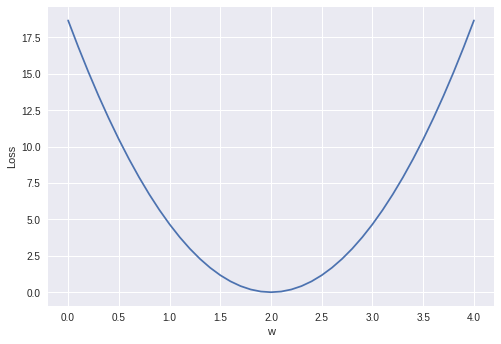

In [8]:
import numpy as np
import matplotlib.pyplot as plt

x_data = [1.0,2.0,3.0]
y_data = [2.0,4.0,6.0]

# w=1.0

def forward(x):
  return x*w

def loss(x,y):
  y_pred = forward(x)
  return (y_pred - y) * (y_pred - y)

w_list=[]
mse_list=[]

for w in np.arange(0.0, 4.1, 0.1):
  print("w=",w)
  l_sum=0
  for x_val, y_val in zip(x_data,y_data):
    y_pred_val = forward(x_val)
    l = loss(x_val,y_val)
    l_sum+=l
    print("\t", x_val, y_val, y_pred_val, l)
  print("MSE=",l_sum / 3)
  w_list.append(w)
  mse_list.append(l_sum / 3)
  
plt.plot(w_list, mse_list)
plt.ylabel('Loss')
plt.xlabel('w')
plt.show()

# Gradient descent with numpy

In [11]:
import numpy as np
import matplotlib.pyplot as plt

x_data = [1.0,2.0,3.0]
y_data = [2.0,4.0,6.0]

w=1.0 # random guess

def forward(x):
  return x*w

def loss(x,y):
  y_pred = forward(x)
  return (y_pred - y) * (y_pred - y)

def gradient(x,y):
  return 2 * x * ( x * w - y )

print("predict (before training)", 4, forward(4))

for epoch in range(100):
  for x_val, y_val in zip(x_data, y_data):
    grad = gradient(x_val, y_val)
    w = w - 0.01 * grad
    print("\tgrad: ",x_val, y_val, grad)
    l = loss(x_val, y_val)
    
  print("progress: ",epoch, "w=",w,"loss=",l)
  
print("predict (after training)", "4 hours" , forward(4))
    

predict (before training) 4 4.0
	grad:  1.0 2.0 -2.0
	grad:  2.0 4.0 -7.84
	grad:  3.0 6.0 -16.2288
progress:  0 w= 1.260688 loss= 4.919240100095999
	grad:  1.0 2.0 -1.478624
	grad:  2.0 4.0 -5.796206079999999
	grad:  3.0 6.0 -11.998146585599997
progress:  1 w= 1.453417766656 loss= 2.688769240265834
	grad:  1.0 2.0 -1.093164466688
	grad:  2.0 4.0 -4.285204709416961
	grad:  3.0 6.0 -8.87037374849311
progress:  2 w= 1.5959051959019805 loss= 1.4696334962911515
	grad:  1.0 2.0 -0.8081896081960389
	grad:  2.0 4.0 -3.1681032641284723
	grad:  3.0 6.0 -6.557973756745939
progress:  3 w= 1.701247862192685 loss= 0.8032755585999681
	grad:  1.0 2.0 -0.59750427561463
	grad:  2.0 4.0 -2.3422167604093502
	grad:  3.0 6.0 -4.848388694047353
progress:  4 w= 1.7791289594933983 loss= 0.43905614881022015
	grad:  1.0 2.0 -0.44174208101320334
	grad:  2.0 4.0 -1.7316289575717576
	grad:  3.0 6.0 -3.584471942173538
progress:  5 w= 1.836707389300983 loss= 0.2399802903801062
	grad:  1.0 2.0 -0.3265852213980338
	gr

# Back Propagation and Autograd with PyTorch

In [13]:
import torch
from torch.autograd import Variable

x_data = [1.0,2.0,3.0]
y_data = [2.0,4.0,6.0]

w = Variable(torch.Tensor([1.0]), requires_grad = True)

def forward(x):
  return x*w

def loss(x,y):
  y_pred = forward(x)
  return (y_pred - y) * (y_pred - y)

print("predict (before training)", 4, forward(4))

for epoch in range(10):
  for x_val, y_val in zip(x_data, y_data):
    l = loss(x_val, y_val)
    l.backward()
    print("\tgrad: ",x_val, y_val, grad)
    w.data = w.data - 0.01 * w.grad.data
    
    w.grad.data.zero_()
    
  print("progress: ",epoch, "w=",w,"loss=",l)
  
print("predict (after training)", "4 hours" , forward(4))

predict (before training) 4 tensor([ 4.])
	grad:  1.0 2.0 -1.6786572132332367e-12
	grad:  2.0 4.0 -1.6786572132332367e-12
	grad:  3.0 6.0 -1.6786572132332367e-12
progress:  0 w= tensor([ 1.2607]) loss= tensor([ 7.3159])
	grad:  1.0 2.0 -1.6786572132332367e-12
	grad:  2.0 4.0 -1.6786572132332367e-12
	grad:  3.0 6.0 -1.6786572132332367e-12
progress:  1 w= tensor([ 1.4534]) loss= tensor([ 3.9988])
	grad:  1.0 2.0 -1.6786572132332367e-12
	grad:  2.0 4.0 -1.6786572132332367e-12
	grad:  3.0 6.0 -1.6786572132332367e-12
progress:  2 w= tensor([ 1.5959]) loss= tensor([ 2.1857])
	grad:  1.0 2.0 -1.6786572132332367e-12
	grad:  2.0 4.0 -1.6786572132332367e-12
	grad:  3.0 6.0 -1.6786572132332367e-12
progress:  3 w= tensor([ 1.7012]) loss= tensor([ 1.1946])
	grad:  1.0 2.0 -1.6786572132332367e-12
	grad:  2.0 4.0 -1.6786572132332367e-12
	grad:  3.0 6.0 -1.6786572132332367e-12
progress:  4 w= tensor([ 1.7791]) loss= tensor([ 0.6530])
	grad:  1.0 2.0 -1.6786572132332367e-12
	grad:  2.0 4.0 -1.678657213

# Linear Regression in PyTorch way

## basic pytorch rythm
1. Design your model using class with Variables
2. Construct loss and optimizer (using pytorch api)
3. Training cycle (forward, backward, update)

### Other Optimizers
 - torch.optim.Adagrad
 - torch.optim.Adam
 - torch.optim.Adamax
 - torch.optim.ASGD
 - torch.optim.LBFGS
 - torch.optim.RMSprop
 - torch.optim.Rprop
 - torch.optim.SGD

In [12]:
import torch
from torch.autograd import Variable


# step1 Design your model using class with Variables

x_data = Variable(torch.Tensor([[1.0],[2.0],[3.0]]))
y_data = Variable(torch.Tensor([[2.0],[4.0],[6.0]]))

class Model(torch.nn.Module):
  def __init__(self):
    super(Model, self).__init__()
    self.linear = torch.nn.Linear(1,1) # one input, one output
    
  def forward(self, x):
    y_pred = self.linear(x)
    return y_pred

# our model instance
model = Model()

# step2 Construct loss and optimizer (using pytorch api)

criterion = torch.nn.MSELoss(size_average=False)
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)

# stpe3 Training cycle: forwad, loss, backward, step

for epoch in range(500):
  y_pred = model(x_data)
  
  loss = criterion(y_pred, y_data)
  if epoch % 50 == 0:
    print(epoch, loss.item())
  
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()
  
hour_var = Variable(torch.Tensor([[4.0]]))
print("predict (after training)", 4, model.forward(hour_var).item())

0 108.97834777832031
50 0.41449713706970215
100 0.20099374651908875
150 0.09746389091014862
200 0.04726118594408035
250 0.022917453199625015
300 0.01111286785453558
350 0.005388767924159765
400 0.002613053424283862
450 0.0012670927681028843
predict (after training) 4 7.971298694610596


# Logistic Regression with pytorch


sigmoid -> 0~1

loss function should be different -> cross entropy loss

In [17]:
import torch
from torch.autograd import Variable
import torch.nn.functional as F

x_data = Variable(torch.Tensor([[1.0], [2.0], [3.0], [4.0]]))
y_data = Variable(torch.Tensor([[0.], [0.], [1.], [1.]]))

class Model(torch.nn.Module):
  def __init__(self):
    super(Model, self).__init__()
    self.linear = torch.nn.Linear(1,1)
    
  def forward(self,x):
    y_pred = F.sigmoid(self.linear(x))
    return y_pred
  
model = Model()

criterion = torch.nn.BCELoss(size_average=True)
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)

for epoch in range(1000):
  y_pred = model(x_data)
  
  loss = criterion(y_pred, y_data)
  if epoch % 50 == 0:
    print(epoch, loss.item())
  
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()
  
hour_var = Variable(torch.Tensor([[1.0]]))
print("predict 1 hour ",1.0,model(hour_var).item()>0.5)
hour_var = Variable(torch.Tensor([[7.0]]))
print("predict 7 hour ",1.0,model(hour_var).item()>0.5)

0 0.7944773435592651
50 0.7147016525268555
100 0.6833253502845764
150 0.6656846404075623
200 0.6512323617935181
250 0.6377397775650024
300 0.6247899532318115
350 0.6122987866401672
400 0.6002395749092102
450 0.5885959267616272
500 0.5773528218269348
550 0.5664961338043213
600 0.5560117959976196
650 0.5458860993385315
700 0.5361055731773376
750 0.5266572833061218
800 0.5175283551216125
850 0.5087064504623413
900 0.5001795291900635
950 0.4919361174106598
predict 1 hour  1.0 False
predict 7 hour  1.0 True


# Wide and Deep

In [45]:
cd ../../

/content


In [47]:
cd drive/data

/content/drive/data


In [49]:
!wget https://github.com/hunkim/PyTorchZeroToAll/raw/master/data/diabetes.csv.gz

--2018-07-13 05:23:05--  https://github.com/hunkim/PyTorchZeroToAll/raw/master/data/diabetes.csv.gz
Resolving github.com (github.com)... 192.30.255.113, 192.30.255.112
Connecting to github.com (github.com)|192.30.255.113|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/hunkim/PyTorchZeroToAll/master/data/diabetes.csv.gz [following]
--2018-07-13 05:23:06--  https://raw.githubusercontent.com/hunkim/PyTorchZeroToAll/master/data/diabetes.csv.gz
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 13539 (13K) [application/octet-stream]
Saving to: ‘diabetes.csv.gz’

diabetes.csv.gz     100%[===================>]  13.22K  43.7KB/s    in 0.3s    

2018-07-13 05:23:10 (43.7 KB/s) - ‘diabetes.csv.gz’ saved [13539/1

In [51]:
cd ../

/content/drive


In [57]:
import torch
from torch.autograd import Variable
import numpy as np

xy = np.loadtxt('./data/diabetes.csv.gz', delimiter=',', dtype=np.float32)
x_data = Variable(torch.from_numpy(xy[:, 0:-1]))
y_data = Variable(torch.from_numpy(xy[:, [-1]]))

class Model(torch.nn.Module):
  def __init__(self):
    super(Model, self).__init__()
    self.l1 = torch.nn.Linear(8,6)
    self.l2 = torch.nn.Linear(6,4)
    self.l3 = torch.nn.Linear(4,2)
    self.l4 = torch.nn.Linear(2,1)
    self.sigmoid = torch.nn.Sigmoid()
  
  def forward(self, x):
    out1 = self.sigmoid(self.l1(x))
    out2 = self.sigmoid(self.l2(out1))
    out3 = self.sigmoid(self.l3(out2))
    y_pred = self.sigmoid(self.l4(out3))
    return y_pred

model = Model()

criterion = torch.nn.BCELoss(size_average=True)
optimizer = torch.optim.SGD(model.parameters(), lr=0.2)

for epoch in range(100):
  y_pred = model(x_data)
  
  loss = criterion(y_pred, y_data)
  print(epoch, loss.item())
  
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

0 0.7357483506202698
1 0.7218292355537415
2 0.7100878357887268
3 0.7001838088035583
4 0.6918265223503113
5 0.6847731471061707
6 0.6788142919540405
7 0.6737775206565857
8 0.6695171594619751
9 0.6659101247787476
10 0.6628547310829163
11 0.660262942314148
12 0.6580643057823181
13 0.6561964154243469
14 0.6546095609664917
15 0.6532593369483948
16 0.6521099209785461
17 0.6511311531066895
18 0.6502965688705444
19 0.6495855450630188
20 0.6489786505699158
21 0.648460328578949
22 0.6480172872543335
23 0.6476388573646545
24 0.6473155617713928
25 0.6470389366149902
26 0.6468020677566528
27 0.6465994119644165
28 0.6464259624481201
29 0.6462767124176025
30 0.6461496353149414
31 0.6460407972335815
32 0.645946741104126
33 0.6458666920661926
34 0.6457980871200562
35 0.6457388401031494
36 0.6456878185272217
37 0.6456445455551147
38 0.6456066966056824
39 0.6455749273300171
40 0.6455476880073547
41 0.6455237865447998
42 0.6455032825469971
43 0.6454861164093018
44 0.6454711556434631
45 0.6454585194587708
4

# PyTorch DataLoader

## Batch Normalization
```python
for epoch in range(training_epochs):
  # Loop over all batches
  for i in range(total_batch):
    
```

In the neural networks terminology

- one epoch = one forward & backward of all the training examples
- batch size = the number of training examples in one forward/backward pass. The higher the batch size, the more memory space you'll need
- number of iterations = number of passes, each pass using batch size number of examples. To be clear, one pass = one forward + one backward

Example: if you have 1000 training examples, and your batch size is 100, then it will take 10 iterations to complete 1 epoch


In [25]:
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.init as init
import torchvision
import torchvision.datasets as dset
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
from torch.autograd import Variable

In [26]:
batch_size= 1
learning_rate = 0.0002
epoch = 100

In [27]:
# Device configuration
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')

# Hyper parameters
epoch = 5
num_classes = 10
batch_size = 100
learning_rate = 0.001

# MNIST dataset
train_dataset = torchvision.datasets.CIFAR10(root='./drive/data/',
                                           train=True, 
                                           transform=transforms.ToTensor(),
                                           download=True)

test_dataset = torchvision.datasets.CIFAR10(root='./drive/data/',
                                          train=False, 
                                          transform=transforms.ToTensor())

# Data loader
train_loader = torch.utils.data.DataLoader(dataset=train_dataset,
                                           batch_size=batch_size, 
                                           shuffle=True)

test_loader = torch.utils.data.DataLoader(dataset=test_dataset,
                                          batch_size=batch_size, 
                                          shuffle=False)

Files already downloaded and verified


In [28]:
def conv_2_block(in_dim,out_dim):
    model = nn.Sequential(
        nn.Conv2d(in_dim,out_dim,kernel_size=3,padding=1),
        nn.ReLU(),
        nn.Conv2d(out_dim,out_dim,kernel_size=3,padding=1),
        nn.ReLU(),
        nn.MaxPool2d(2,2)
    )
    return model

def conv_3_block(in_dim,out_dim):
    model = nn.Sequential(
        nn.Conv2d(in_dim,out_dim,kernel_size=3,padding=1),
        nn.ReLU(),
        nn.Conv2d(out_dim,out_dim,kernel_size=3,padding=1),
        nn.ReLU(),
        nn.Conv2d(out_dim,out_dim,kernel_size=3,padding=1),
        nn.ReLU(),
        nn.MaxPool2d(2,2)
    )
    return model

In [29]:
class VGG(nn.Module):

    def __init__(self, base_dim, num_classes=num_classes):
        super(VGG, self).__init__()
        self.feature = nn.Sequential(
            conv_2_block(3,base_dim),
            conv_2_block(base_dim,2*base_dim),
            conv_3_block(2*base_dim,4*base_dim),
            conv_3_block(4*base_dim,8*base_dim),
            conv_3_block(8*base_dim,8*base_dim),            
        )
        self.fc_layer = nn.Sequential(
            nn.Linear(8*base_dim, 100),
            nn.ReLU(),
            nn.Dropout(),
            nn.Linear(100, 20),
            nn.ReLU(),
            nn.Dropout(),
            nn.Linear(20, num_classes),
        )

    def forward(self, x):
        x = self.feature(x)
        x = x.view(x.size(0), -1)
        x = self.fc_layer(x)
        return x
    
model = VGG(base_dim=64).cuda()

for i in model.named_children():
    print(i)

('feature', Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (1): Sequential(
    (0): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (2): Sequential(
    (0): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (5): ReLU()
    (6): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (3): Seq

In [30]:
loss_func = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(),lr=learning_rate)

In [32]:
for i in range(epoch):
    for img,label in train_loader:
        img = Variable(img).cuda()
        label = Variable(label).cuda()

        optimizer.zero_grad()
        output = model(img)
        loss = loss_func(output,label)
        loss.backward()
        optimizer.step()

    print(loss)

tensor(2.3021, device='cuda:0')
tensor(2.3004, device='cuda:0')
tensor(2.3034, device='cuda:0')
tensor(2.3032, device='cuda:0')
tensor(2.3020, device='cuda:0')
